# Phase 3

## SQL Operations

Note: Create a separate table for each file and give a meaningful name.

When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.


3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [1]:
import sqlite3
import csv
import pandas as pd

### 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [2]:
#Creating a database crimes

database = sqlite3.connect('crimes.db')

In [3]:
database.execute("DROP TABLE IF EXISTS CRIME")

In [4]:
cursor=database.cursor()

In [5]:
# Creating table crimes_against_women

cursor.execute('''
        CREATE TABLE crimes_against_women (
        State_UT TEXT,
        DISTRICT TEXT,
        Year INT,
        Rape INT,
        Kidnapping_and_Abduction INT,
        Dowry_Deaths INT,
        Assault_on_women_with_intent_to_outrage_her_modesty INT,
        Insult_to_modesty_of_Women INT,
        Cruelty_by_Husband_or_his_Relatives INT,
        Importation_of_Girls INT
    )
''')

database.commit()

In [7]:
#Loading dataset

df= pd.read_csv('42_District_wise_crimes_committed_against_women_2001_2012.csv')
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [8]:
# Renaming columns

df.rename(columns={'STATE/UT':'STATE_UT', 'Kidnapping and Abduction':'Kidnapping_and_Abduction', 'Dowry Deaths':'Dowry_Deaths', 'Assault on women with intent to outrage her modesty':'Assault_on_women_with_intent_to_outrage_her_modesty', 'Insult to modesty of Women':'Insult_to_modesty_of_Women', 'Cruelty by Husband or his Relatives':'Cruelty_by_Husband_or_his_Relatives', 'Importation of Girls':'Importation_of_Girls'},inplace=True)

df.head()

,STATE_UT,DISTRICT,Year,Rape,Kidnapping_and_Abduction,Dowry_Deaths,Assault_on_women_with_intent_to_outrage_her_modesty,Insult_to_modesty_of_Women,Cruelty_by_Husband_or_his_Relatives,Importation_of_Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [11]:
# # Uploading data to the table

df.to_sql('crimes_against_women', database, if_exists='replace', index=False)

# Commit changes 
database.commit()

### 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year

In [28]:
# Highest number of rapes 

query=cursor.execute("SELECT STATE_UT, DISTRICT,Year,max(Rape) FROM crimes_against_women ORDER BY Rape desc")
for row in query:
    print(row)

('MADHYA PRADESH', 'TOTAL', 2012, 3425)


In [29]:
# Highest number of Kidnappings 

query=cursor.execute("SELECT STATE_UT, DISTRICT,Year,max(Kidnapping_and_Abduction) FROM crimes_against_women ORDER BY Kidnapping_and_Abduction desc")
for row in query:
    print(row)

('UTTAR PRADESH', 'TOTAL', 2012, 7910)


### 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [31]:
# Rapes state wise

query=cursor.execute("SELECT  STATE_UT, DISTRICT ,Year ,min(Rape) FROM crimes_against_women GROUP BY STATE_UT ORDER BY Rape asc")

for row in query:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'KAMENG WEST', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('CHHATTISGARH', 'GRP RAIPUR', 2001, 0)
('DAMAN & DIU', 'DAMAN', 2001, 0)
('DELHI', 'I.G.I. AIRPORT', 2001, 0)
('GUJARAT', 'AHWA-DANG', 2003, 0)
('HARYANA', 'GRP', 2001, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JHARKHAND', 'DHANBAD RLY.', 2003, 0)
('KARNATAKA', 'DHARWAD RURAL', 2002, 0)
('KERALA', 'CBCID', 2002, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('MADHYA PRADESH', 'JABALPUR RLY.', 2001, 0)
('MAHARASHTRA', 'PUNE RLY.', 2001, 0)
('MANIPUR', 'CHANDEL', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2004, 0)
('MIZORAM', 'MAMIT', 2001, 0)
('NAGALAND', 'KIPHIRE', 2001, 0)
('ODISHA', 'SRP(ROURKELA)', 2002, 0)
('PUDUCHERRY', 'KARAIKAL', 2009, 0)
('PUNJAB', 'G.R.P', 2001, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0)
('SIKKIM', 'NORTH', 2001, 0)
('TAMIL NADU', 'CHENNAI R

In [32]:
# Rapes district wise

query=cursor.execute("SELECT  STATE_UT, DISTRICT ,Year ,min(Rape) FROM crimes_against_women GROUP BY DISTRICT ORDER BY Rape asc")

for row in query:
    print(row)

('GUJARAT', 'AHWA-DANG', 2003, 0)
('ARUNACHAL PRADESH', 'ANJAW', 2009, 0)
('BIHAR', 'ARWAL', 2001, 0)
('WEST BENGAL', 'ASANSOL', 2001, 0)
('MADHYA PRADESH', 'BHOPAL RLY.', 2011, 0)
('ASSAM', 'BIEO', 2012, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('A & N ISLANDS', 'CAR', 2012, 0)
('DELHI', 'CAW', 2008, 0)
('KERALA', 'CBCID', 2002, 0)
('UTTARAKHAND', 'CHAMPAWAT', 2001, 0)
('MANIPUR', 'CHANDEL', 2001, 0)
('TAMIL NADU', 'CHENNAI RLY.', 2001, 0)
('MANIPUR', 'CHURACHANDPUR', 2002, 0)
('MANIPUR', 'CID', 2008, 0)
('GUJARAT', 'CID CRIME', 2011, 0)
('DELHI', 'CRIME BRANCH', 2008, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JAMMU & KASHMIR', 'CRIME KASHMIR', 2010, 0)
('JAMMU & KASHMIR', 'CRIME SRINAGAR', 2001, 0)
('GUJARAT', 'DAHOD', 2003, 0)
('DAMAN & DIU', 'DAMAN', 2001, 0)
('JHARKHAND', 'DHANBAD RLY.', 2003, 0)
('KARNATAKA', 'DHARWAD COMMR.', 2005, 0)
('KARNATAKA', 'DHARWAD RURAL', 2002, 0)
('ARUNACHAL PRADESH', 'DIBANG VALLEY', 2005, 0)
('DAMAN & DIU', 'DIU', 2001, 0)
('DELHI', 'EOW', 2008, 0)
('

In [33]:
# Rapes year wise

query=cursor.execute("SELECT  STATE_UT, DISTRICT ,Year ,min(Rape) FROM crimes_against_women GROUP BY Year ORDER BY Rape asc")

for row in query:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2002, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2003, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2004, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2005, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2006, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2007, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2008, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2009, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2010, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2011, 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2012, 0)


In [34]:
# Kidnappings state wise

query=cursor.execute("SELECT  STATE_UT, DISTRICT ,Year ,min(Kidnapping_and_Abduction) FROM crimes_against_women GROUP BY STATE_UT ORDER BY Kidnapping_and_Abduction asc")

for row in query:
    print(row)

('A & N ISLANDS', 'NICOBAR', 2001, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('BIHAR', 'ARWAL', 2001, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0)
('DAMAN & DIU', 'DIU', 2001, 0)
('DELHI', 'S.T.F.', 2001, 0)
('GUJARAT', 'W.RLY', 2001, 0)
('HARYANA', 'GRP', 2002, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0)
('KERALA', 'CBCID', 2001, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 0)
('MAHARASHTRA', 'MUMBAI RLY.', 2001, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0)
('MIZORAM', 'AIZAWL', 2001, 0)
('NAGALAND', 'KIPHIRE', 2001, 0)
('ODISHA', 'RAYAGADA', 2001, 0)
('PUDUCHERRY', 'KARAIKAL', 2011, 0)
('PUNJAB', 'G.R.P', 2001, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0)
('SIKKIM', 'NORTH', 2001, 0)
('TAMIL NADU', 'CHENNAI', 2001, 0)
('TRIPURA', 'DHAL

In [36]:
# Kidnappings district wise

query=cursor.execute("SELECT  STATE_UT, DISTRICT ,Year ,min(Kidnapping_and_Abduction) FROM crimes_against_women GROUP BY DISTRICT ORDER BY Kidnapping_and_Abduction asc")

for row in query:
    print(row)

('GUJARAT', 'AHWA-DANG', 2003, 0)
('MIZORAM', 'AIZAWL', 2001, 0)
('UTTARAKHAND', 'ALMORA', 2007, 0)
('ARUNACHAL PRADESH', 'ANJAW', 2009, 0)
('BIHAR', 'ARWAL', 2001, 0)
('WEST BENGAL', 'ASANSOL', 2001, 0)
('UTTARAKHAND', 'BAGESHWAR', 2003, 0)
('CHHATTISGARH', 'BALRAMPUR', 2003, 0)
('KARNATAKA', 'BANGALORE RURAL', 2002, 0)
('WEST BENGAL', 'BDN CP', 2012, 0)
('MADHYA PRADESH', 'BHOPAL RLY.', 2002, 0)
('ASSAM', 'BIEO', 2012, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0)
('MADHYA PRADESH', 'BURHANPUR', 2003, 0)
('BIHAR', 'BUXAR', 2002, 0)
('ASSAM', 'C.I.D.', 2001, 0)
('DELHI', 'CAW', 2008, 0)
('KERALA', 'CBCID', 2001, 0)
('JHARKHAND', 'CHAIBASA', 2005, 0)
('UTTARAKHAND', 'CHAMOLI', 2006, 0)
('UTTARAKHAND', 'CHAMPAWAT', 2006, 0)
('MIZORAM', 'CHAMPHAI', 2001, 0)
('MANIPUR', 'CHANDEL', 2002, 0)
('TAMIL NADU', 'CHENNAI', 2001, 0)
('TAMIL NADU', 'CHENNAI RLY.', 2001, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0)
('UTTAR PRADESH', 'CHITRAKOOT DHAM', 2003, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0)
('MANIPUR',

In [37]:
# Kidnappings year wise

query=cursor.execute("SELECT  STATE_UT, DISTRICT ,Year ,min(Kidnapping_and_Abduction) FROM crimes_against_women GROUP BY Year ORDER BY Kidnapping_and_Abduction asc")

for row in query:
    print(row)

('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2002, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2003, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2004, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2005, 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2006, 0)
('ANDHRA PRADESH', 'SECUNDERABAD RLY.', 2007, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2008, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2009, 0)
('ANDHRA PRADESH', 'VIJAYAWADA RLY.', 2010, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2011, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2012, 0)


### 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [45]:
# Creating table crimes_against_ST


cursor.execute('''
        CREATE TABLE crimes_against_ST (
        State_UT TEXT,
        DISTRICT TEXT,
        Year INT,
        Murder INT,
        Rape INT,
        Kidnapping_and_Abduction INT,
        Dacoity INT,
        Robbery INT,
        Arson INT,
        Hurt INT,
        Protection_of_Civil_Rights INT,
        Prevention_of_atrocities INT,
        Other_Crimes_Against_STs INT)
''')

database.commit()

In [46]:
#Loading dataset

df1= pd.read_csv('02_District_wise_crimes_committed_against_ST_2001_2012.csv')
df1.head()

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14


In [48]:
# Renaming columns

df1.rename(columns={'STATE/UT':'STATE_UT', 'Kidnapping Abduction':'Kidnapping_and_Abduction', 'Protection of Civil Rights (PCR) Act':'Protection_of_Civil_Rights', 'Prevention of atrocities (POA) Act':'Prevention_of_atrocities', 'Other Crimes Against STs':'Other_Crimes_Against_STs'},inplace=True)

df1.head()

,STATE_UT,DISTRICT,Year,Murder,Rape,Kidnapping_and_Abduction,Dacoity,Robbery,Arson,Hurt,Protection_of_Civil_Rights,Prevention_of_atrocities,Other_Crimes_Against_STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14


In [49]:
# Uploading data to the table

df1.to_sql('crimes_against_ST', database, if_exists='replace', index=False)

# Commit changes 
database.commit()

### 3.5	Write SQL query to find the highest number of dacoity/robbery in which district.

In [52]:
# Highest number of dacoity 

query=cursor.execute("SELECT STATE_UT, DISTRICT,Year,max(Dacoity) FROM crimes_against_ST ORDER BY Dacoity desc")
for row in query:
    print(row)

('GUJARAT', 'DAHOD', 2004, 29)


In [53]:
# Highest number of robbery 

query=cursor.execute("SELECT STATE_UT, DISTRICT,Year,max(Robbery) FROM crimes_against_ST ORDER BY Robbery desc")
for row in query:
    print(row)

('GUJARAT', 'TOTAL', 2004, 34)


### 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

In [55]:
# Murders district wise

query=cursor.execute("SELECT  STATE_UT, DISTRICT, min(Murder) FROM crimes_against_ST GROUP BY DISTRICT ORDER BY Murder asc")

for row in query:
    print(row)

('WEST BENGAL', '24 PARGANAS NORTH', 0)
('WEST BENGAL', '24 PARGANAS SOUTH', 0)
('A & N ISLANDS', 'A and N ISLANDS', 0)
('ANDHRA PRADESH', 'ADILABAD', 0)
('UTTAR PRADESH', 'AGRA', 0)
('GUJARAT', 'AHMEDABAD COMMR.', 0)
('GUJARAT', 'AHMEDABAD RURAL', 0)
('MAHARASHTRA', 'AHMEDNAGAR', 0)
('GUJARAT', 'AHWA-DANG', 0)
('MIZORAM', 'AIZAWL', 0)
('RAJASTHAN', 'AJMER', 0)
('MAHARASHTRA', 'AKOLA', 0)
('KERALA', 'ALAPUZHA', 0)
('UTTAR PRADESH', 'ALIGARH', 0)
('MADHYA PRADESH', 'ALIRAJPUR', 0)
('UTTAR PRADESH', 'ALLAHABAD', 0)
('UTTARAKHAND', 'ALMORA', 0)
('RAJASTHAN', 'ALWAR', 0)
('HARYANA', 'AMBALA', 0)
('HARYANA', 'AMBALA RURAL', 0)
('HARYANA', 'AMBALA URBAN', 0)
('UTTAR PRADESH', 'AMBEDKAR NAGAR', 0)
('MAHARASHTRA', 'AMRAVATI COMMR.', 0)
('MAHARASHTRA', 'AMRAVATI RURAL', 0)
('GUJARAT', 'AMRELI', 0)
('PUNJAB', 'AMRITSAR', 0)
('PUNJAB', 'AMRITSAR RURAL', 0)
('GUJARAT', 'ANAND', 0)
('ANDHRA PRADESH', 'ANANTAPUR', 0)
('JAMMU & KASHMIR', 'ANANTNAG', 0)
('A & N ISLANDS', 'ANDAMAN', 0)
('ODISHA', 'ANGU

### 3.7	Write SQL query to find the number of murders in ascending order in district and yearwise.

In [57]:
query=cursor.execute("SELECT DISTRICT, Year, COUNT(*) AS num_of_murders FROM crimes_against_ST GROUP BY DISTRICT, Year ORDER BY district ASC, year ASC")

for row in query:
    print(row)

('24 PARGANAS NORTH', 2001, 1)
('24 PARGANAS NORTH', 2002, 1)
('24 PARGANAS NORTH', 2003, 1)
('24 PARGANAS NORTH', 2004, 1)
('24 PARGANAS NORTH', 2005, 1)
('24 PARGANAS NORTH', 2006, 1)
('24 PARGANAS NORTH', 2007, 1)
('24 PARGANAS NORTH', 2008, 1)
('24 PARGANAS NORTH', 2009, 1)
('24 PARGANAS NORTH', 2010, 1)
('24 PARGANAS NORTH', 2011, 1)
('24 PARGANAS NORTH', 2012, 1)
('24 PARGANAS SOUTH', 2001, 1)
('24 PARGANAS SOUTH', 2002, 1)
('24 PARGANAS SOUTH', 2003, 1)
('24 PARGANAS SOUTH', 2004, 1)
('24 PARGANAS SOUTH', 2005, 1)
('24 PARGANAS SOUTH', 2006, 1)
('24 PARGANAS SOUTH', 2007, 1)
('24 PARGANAS SOUTH', 2008, 1)
('24 PARGANAS SOUTH', 2009, 1)
('24 PARGANAS SOUTH', 2010, 1)
('24 PARGANAS SOUTH', 2011, 1)
('24 PARGANAS SOUTH', 2012, 1)
('A and N ISLANDS', 2007, 1)
('ADILABAD', 2001, 1)
('ADILABAD', 2002, 1)
('ADILABAD', 2003, 1)
('ADILABAD', 2004, 1)
('ADILABAD', 2005, 1)
('ADILABAD', 2006, 1)
('ADILABAD', 2007, 1)
('ADILABAD', 2008, 1)
('ADILABAD', 2009, 1)
('ADILABAD', 2010, 1)
('ADILA

### 3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [58]:
# Creating table crimes_committed_ipc

cursor.execute ('''CREATE TABLE crimes_committed_ipc
                (STATE_UT TEXT,
                 DISTRICT TEXT,
                 YEAR INT,
                 MURDER INT,
                 ATTEMPT_to_MURDER INT,
                 RAPE INT)''')

database.commit()

In [59]:
#Loading dataset

df2= pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df2.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [60]:
# Renaming columns

df2.rename(columns={'STATE/UT':'STATE_UT', 'ATTEMPT TO MURDER':'ATTEMPT_to_MURDER'},inplace=True)

df2.head()

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT_to_MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [66]:
# Dropping unnesessery columns

df2.drop(columns=['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER','CUSTODIAL RAPE','OTHER RAPE','KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS','DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY','ROBBERY','BURGLARY','THEFT','AUTO THEFT','OTHER THEFT','RIOTS','CRIMINAL BREACH OF TRUST','CHEATING','COUNTERFIETING','ARSON','HURT/GREVIOUS HURT','DOWRY DEATHS','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY','INSULT TO MODESTY OF WOMEN','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE','OTHER IPC CRIMES','TOTAL IPC CRIMES'], inplace=True)

df2.head()

,STATE_UT,DISTRICT,YEAR,MURDER,ATTEMPT_to_MURDER,RAPE
0,ANDHRA PRADESH,ADILABAD,2001,101,60,50
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,23
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,27
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,23


In [67]:
# Uploading data to the table

df2.to_sql('crimes_committed_ipc', database, if_exists='replace', index=False)

# Commit changes 
database.commit()

### 3.8.2	Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [ ]:
query=cursor.execute("SELECT DISTRICT, Year, COUNT(*) AS num_of_murders FROM crimes_against_ST GROUP BY DISTRICT, Year ORDER BY district ASC, year ASC")

for row in query:
    print(row)

In [72]:
query=cursor.execute("SELECT m.STATE_UT AS STATE_UT, m.YEAR AS YEAR, m.DISTRICT AS DISTRICT, m.MURDER AS MURDER FROM crimes_committed_ipc m JOIN (SELECT STATE_UT, YEAR, MAX(MURDER) AS max_murders FROM crimes_committed_ipc GROUP BY STATE_UT, YEAR) t ON m.STATE_UT = t.STATE_UT AND m.YEAR = t.YEAR AND m.MURDER = t.max_murders")

for row in query:
    print(row)

('ANDHRA PRADESH', 2001, 'TOTAL', 2602)
('ARUNACHAL PRADESH', 2001, 'TOTAL', 83)
('ASSAM', 2001, 'TOTAL', 1356)
('BIHAR', 2001, 'TOTAL', 3643)
('CHHATTISGARH', 2001, 'TOTAL', 880)
('GOA', 2001, 'TOTAL', 36)
('GUJARAT', 2001, 'TOTAL', 1226)
('HARYANA', 2001, 'TOTAL', 781)
('HIMACHAL PRADESH', 2001, 'TOTAL', 119)
('JAMMU & KASHMIR', 2001, 'TOTAL', 1075)
('JHARKHAND', 2001, 'TOTAL', 1507)
('KARNATAKA', 2001, 'TOTAL', 1626)
('KERALA', 2001, 'TOTAL', 472)
('MADHYA PRADESH', 2001, 'TOTAL', 2425)
('MAHARASHTRA', 2001, 'TOTAL', 2839)
('MANIPUR', 2001, 'TOTAL', 209)
('MEGHALAYA', 2001, 'TOTAL', 164)
('MIZORAM', 2001, 'TOTAL', 31)
('NAGALAND', 2001, 'TOTAL', 101)
('ODISHA', 2001, 'TOTAL', 987)
('PUNJAB', 2001, 'TOTAL', 738)
('RAJASTHAN', 2001, 'TOTAL', 1259)
('SIKKIM', 2001, 'TOTAL', 19)
('TAMIL NADU', 2001, 'TOTAL', 1662)
('TRIPURA', 2001, 'TOTAL', 240)
('UTTAR PRADESH', 2001, 'TOTAL', 7601)
('UTTARAKHAND', 2001, 'TOTAL', 316)
('WEST BENGAL', 2001, 'TOTAL', 1594)
('A & N ISLANDS', 2001, 'ANDAMA

### 3.8.3	Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [76]:
# Creating empty lists for each column State_UT, District, Year, and Murder

STATE_UT = []
DISTRICT = []
YEAR = []
MURDER = []

sql_query = ('''
SELECT M.STATE_UT, M.YEAR, M.DISTRICT, M.MURDER
FROM crimes_committed_ipc M
JOIN (
    SELECT STATE_UT, YEAR, MAX(MURDER) AS MAX_MURDERS
    FROM crimes_committed_ipc
    GROUP BY STATE_UT, YEAR
) AS MaxMurders
ON M.STATE_UT = MaxMurders.STATE_UT
AND M.YEAR = MaxMurders.YEAR
AND M.MURDER = MaxMurders.MAX_MURDERS;
''')


df_new = pd.read_sql_query(sql_query, database)
df_new

,STATE_UT,YEAR,DISTRICT,MURDER
0,ANDHRA PRADESH,2001,TOTAL,2602
1,ARUNACHAL PRADESH,2001,TOTAL,83
2,ASSAM,2001,TOTAL,1356
3,BIHAR,2001,TOTAL,3643
4,CHHATTISGARH,2001,TOTAL,880
...,...,...,...,...
471,DAMAN & DIU,2012,TOTAL,3
472,DELHI UT,2012,DELHI UT TOTAL,521
473,LAKSHADWEEP,2012,LAKSHADWEEP,0
474,LAKSHADWEEP,2012,TOTAL,0


In [80]:
# Number of years for each district

years = df_new.groupby(['STATE_UT', 'DISTRICT']).YEAR.nunique().reset_index(name = 'Years Count')
years

,STATE_UT,DISTRICT,Years Count
0,A & N ISLANDS,A and N ISLANDS,1
1,A & N ISLANDS,ANDAMAN,5
2,A & N ISLANDS,TOTAL,12
3,ANDHRA PRADESH,TOTAL,12
4,ARUNACHAL PRADESH,TOTAL,12
5,ASSAM,TOTAL,12
6,BIHAR,TOTAL,12
7,CHANDIGARH,CHANDIGARH,12
8,CHANDIGARH,TOTAL,12
9,CHHATTISGARH,TOTAL,12


In [82]:
# District which appering 3 more than 3 years

districts = years[years['Years Count'] >= 3].reset_index(drop = True)
districts

,STATE_UT,DISTRICT,Years Count
0,A & N ISLANDS,ANDAMAN,5
1,A & N ISLANDS,TOTAL,12
2,ANDHRA PRADESH,TOTAL,12
3,ARUNACHAL PRADESH,TOTAL,12
4,ASSAM,TOTAL,12
5,BIHAR,TOTAL,12
6,CHANDIGARH,CHANDIGARH,12
7,CHANDIGARH,TOTAL,12
8,CHHATTISGARH,TOTAL,12
9,D & N HAVELI,D and N HAVELI,12


In [83]:
# Creating new DataFrame

dfnew = pd.merge(districts, df_new, on = ['STATE_UT', 'DISTRICT'], how = 'inner')

print(dfnew)

          STATE_UT DISTRICT  Years Count  YEAR  MURDER
0    A & N ISLANDS  ANDAMAN            5  2001      13
1    A & N ISLANDS  ANDAMAN            5  2005      14
2    A & N ISLANDS  ANDAMAN            5  2008       8
3    A & N ISLANDS  ANDAMAN            5  2009      15
4    A & N ISLANDS  ANDAMAN            5  2011      14
..             ...      ...          ...   ...     ...
469    WEST BENGAL    TOTAL           12  2008    1811
470    WEST BENGAL    TOTAL           12  2009    2068
471    WEST BENGAL    TOTAL           12  2010    2398
472    WEST BENGAL    TOTAL           12  2011    2109
473    WEST BENGAL    TOTAL           12  2012    2252

[474 rows x 5 columns]


### 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

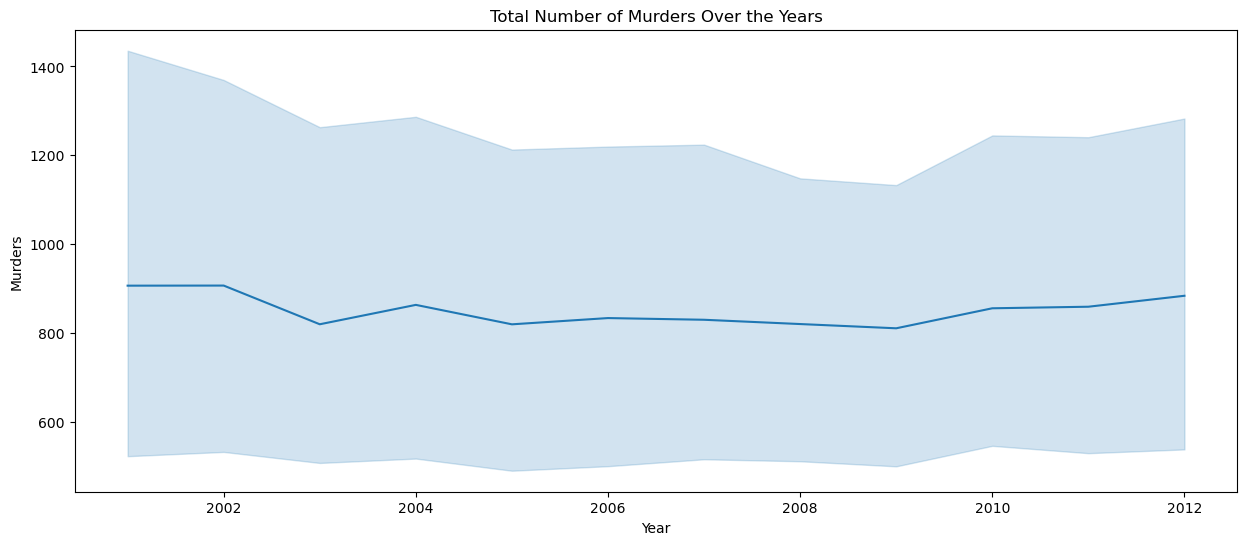

In [88]:
plt.figure(figsize=(15, 6))

sns.lineplot(x='YEAR', y='MURDER', data=dfnew)
plt.title('Total Number of Murders Over the Years')
plt.xlabel('Year')
plt.ylabel('Murders')
plt.show()

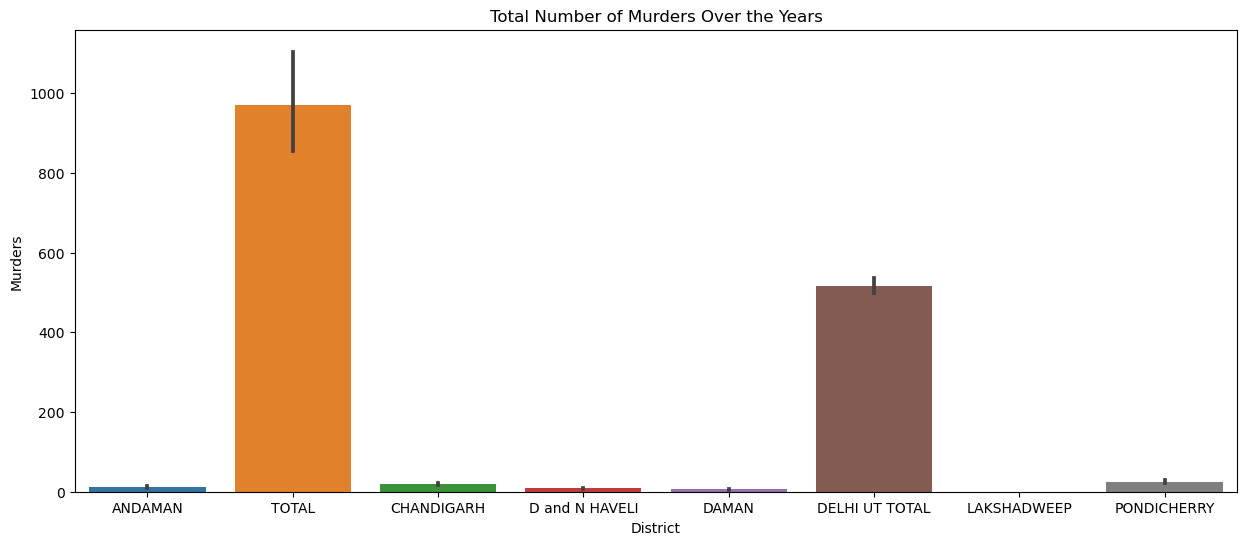

In [87]:
plt.figure(figsize=(15, 6))

sns.barplot(x='DISTRICT', y='MURDER', data=dfnew)
plt.title('Total Number of Murders Over the Years')
plt.xlabel('District')
plt.ylabel('Murders')
plt.show()